<a href="https://colab.research.google.com/github/chrissintha/Machine-Learning/blob/main/Regression_ML_Housingdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Housing Data - Regression**

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [124]:
housing = pd.read_csv('https://raw.githubusercontent.com/JoanClaverol/housing_regression_data/main/train.csv')
housing.head(4)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  

[4 rows x 81 columns]

Data Cleaning and streamlining

In [125]:
# check duplicated rows
housing.duplicated().sum()

0

In [126]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [127]:
housing.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Data Analysis

In [128]:
#Add Property Info
housing['Location_info'] = housing[['Street', 'Alley','MSZoning','LandContour','LotShape','LotConfig','LandSlope']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [129]:
#Add Roof Info
housing['roof_info'] = housing[['RoofStyle', 'RoofMatl']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [130]:
#Add Basement QC+
housing['BsmtCoQC'] = housing[['BsmtCond', 'BsmtQual']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [131]:
#Add basementFin Info
housing['bsmt_fin'] = housing[['BsmtFinType1', 'BsmtFinType2']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [132]:
#BAsement fin SQFT
housing['bast_fin_SQFT'] =  housing[[ 'BsmtFinSF1', 'BsmtFinSF2']].sum(axis=1)

In [133]:
#No of baths
housing['temp']= (housing[['HalfBath', 'BsmtHalfBath']].sum(axis=1))*.5
housing['Baths'] =  housing[['temp','BsmtFullBath','FullBath']].sum(axis=1)

In [134]:
#materials :Extr
housing['materialsUsed_info'] = housing[['Exterior1st', 'Exterior2nd', 'MasVnrType']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [135]:
#building SF
housing['building_SF'] =  housing[[ '1stFlrSF', '2ndFlrSF','TotalBsmtSF']].sum(axis=1)

In [136]:
#Misc_SF
housing['Misc_SF'] =  housing[['WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','GarageArea']].sum(axis=1)

In [137]:
housing['MSSubClass']= housing['MSSubClass'].values.astype(str)


In [138]:
housing['Condition']= housing[['Condition1','Condition2']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [139]:
#Add information about the building
housing['Bldg_info'] = housing[['MSSubClass', 'BldgType','HouseStyle']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [140]:
housing.loc[housing["YearRemodAdd"] =="", "YearRemodAdd"] = 0
housing.loc[housing["YearBuilt"] =="", "YearBuilt"] = 0

In [141]:
#Calculate Age of property
from datetime import date

today = date.today()

housing['Age'] =  today.year - housing['YearBuilt']

housing['yr_sold'] = today.year - housing['YrSold'] -((today.month) <(housing['MoSold']))

In [142]:
#Garage Quality and condition
housing['GarageQuCo'] = housing[['GarageCond', 'GarageCond']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [143]:
housing.loc[housing["GarageQuCo"] =="", "GarageQuCo"] = 0

In [144]:
#Modify datatypes
housing['GarageYrBlt']= housing['GarageYrBlt'].values.astype(str)
housing['GarageCars']= housing['GarageCars'].values.astype(str)

In [145]:
#Garage information
housing['Garage-info'] = housing[[ 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [146]:
#Heating information
housing['Heating_info'] = housing[['Heating', 'HeatingQC']].apply(lambda x: ','.join(x.dropna()), axis=1)

In [147]:
housing.sample(25)

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
69      70         50       RL         81.0    15593   Pave   NaN      Reg   
847    848         20       RL         36.0    15523   Pave   NaN      IR1   
265    266         20       RL         78.0    12090   Pave   NaN      IR1   
1297  1298        180       RM         35.0     3675   Pave   NaN      Reg   
898    899         20       RL        100.0    12919   Pave   NaN      IR1   
793    794         20       RL         76.0     9158   Pave   NaN      Reg   
557    558         50  C (all)         60.0    11040   Pave   NaN      Reg   
1100  1101         30       RL         60.0     8400   Pave   NaN      Reg   
260    261         80       RL        120.0    19296   Pave   NaN      Reg   
914    915        160       FV         30.0     3000   Pave  Pave      Reg   
428    429         20       RL         64.0     6762   Pave   NaN      Reg   
906    907         20       RL        116.0    13501   Pave   NaN      IR1   
444    445         60       RL         70.0     8750   Pave   NaN      Reg   
52      53         90       RM        110.0     8472   Grvl   NaN      IR2   
27      28         20       RL         98.0    11478   Pave   NaN      Reg   
65      66         60       RL         76.0     9591   Pave   NaN      Reg   
956    957        160       RM         24.0     1300   Pave   NaN      Reg   
1253  1254         60       RL          NaN    17542   Pave   NaN      IR1   
1177  1178         50       RM          NaN     3950   Pave  Grvl      Reg   
802    803         60       RL         63.0     8199   Pave   NaN      Reg   
310    311         60       RL          NaN     7685   Pave   NaN      IR1   
1413  1414         20       RL         88.0    10994   Pave   NaN      IR1   
413    414         30       RM         56.0     8960   Pave  Grvl      Reg   
1310  1311         20       RL        100.0    17500   Pave   NaN      Reg   
56      57        160       FV         24.0     2645   Pave  Pave      Reg   

     LandContour Utilities  ...       materialsUsed_info building_SF Misc_SF  \
69           Lvl    AllPub  ...     BrkFace,AsbShng,None        3591     802   
847          Lvl    AllPub  ...     HdBoard,Plywood,None        1728     338   
265          Lvl    AllPub  ...  MetalSd,MetalSd,BrkFace        2844     852   
1297         Lvl    AllPub  ...  VinylSd,VinylSd,BrkFace        1619     569   
898          Lvl    AllPub  ...    VinylSd,VinylSd,Stone        4694     887   
793          Lvl    AllPub  ...    CemntBd,CmentBd,Stone        2992     772   
557          Low    AllPub  ...     MetalSd,MetalSd,None        1973     737   
1100         Bnk    AllPub  ...     Wd Sdng,Wd Sdng,None         728     246   
260          Lvl    AllPub  ...  Wd Sdng,Wd Sdng,BrkFace        2744    1136   
914          Lvl    AllPub  ...    VinylSd,VinylSd,Stone        1836     762   
428          Lvl    AllPub  ...  VinylSd,VinylSd,BrkFace        2416     787   
906          Lvl    AllPub  ...    VinylSd,VinylSd,Stone        3259     925   
444          Lvl    AllPub  ...     VinylSd,VinylSd,None        2823     770   
52           Bnk    AllPub  ...     Wd Sdng,Wd Sdng,None        1632     622   
27           Lvl    AllPub  ...    VinylSd,VinylSd,Stone        3408     822   
65           Lvl    AllPub  ...  VinylSd,VinylSd,BrkFace        3616    1195   
956          Lvl    AllPub  ...     MetalSd,MetalSd,None        1790     612   
1253         Lvl    AllPub  ...     Wd Sdng,Wd Sdng,None        3359     785   
1177         Bnk    AllPub  ...     MetalSd,MetalSd,None        2042     326   
802          Lvl    AllPub  ...     WdShing,Wd Shng,None        2184     464   
310          Lvl    AllPub  ...  HdBoard,HdBoard,BrkFace        2198     673   
1413         Lvl    AllPub  ...    VinylSd,VinylSd,Stone        3688     829   
413          Lvl    AllPub  ...     WdShing,Wd Shng,None        2036     490   
1310         Lvl    AllPub  ...     BrkFace,HdBoard,None   

In [148]:
X = housing.drop(columns=['SalePrice','Street', 'Alley','MSZoning','LandContour','LotShape','LotConfig','LandSlope','1stFlrSF', '2ndFlrSF','TotalBsmtSF','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','GarageArea','Condition1','Condition2','MSSubClass', 'BldgType','HouseStyle','YearBuilt','YrSold','MoSold',
       'GarageCond', 'GarageCond','GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars','Heating', 'HeatingQC','HalfBath', 'BsmtHalfBath','BsmtFullBath','FullBath',
       'RoofStyle', 'RoofMatl','BsmtFinSF1', 'BsmtFinSF2','BsmtFinType1', 'BsmtFinType2','KitchenAbvGr','BedroomAbvGr','BsmtCond', 'BsmtQual'])
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

**1st iteration: dummy model and linear regression + regression errors**

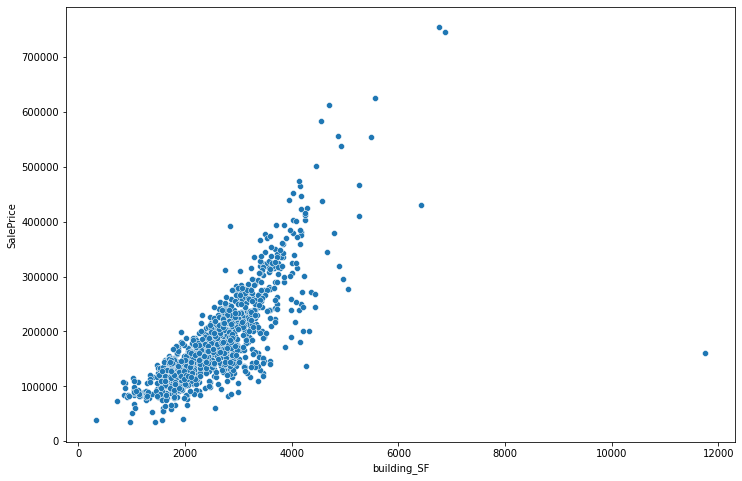

In [149]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['building_SF'], y=y_train)
plt.show()

In [150]:
#Based on the graph create a real simple model:

def my_dummy_model(building_SF): 
    return building_SF * 80

dummy_model_res = (
X_train
    .assign(
        preds = lambda x: my_dummy_model(x['building_SF']), 
        SalePrice = y_train
        )
    .assign(
        error = lambda x:  x['preds'] - x['SalePrice']
    )
)
dummy_model_res

Id  LotFrontage  LotArea Utilities Neighborhood  OverallQual  \
884    885         65.0     7150    AllPub        NAmes            5   
641    642          NaN     7050    AllPub      Somerst            7   
1357  1358          NaN    12537    AllPub        NAmes            5   
469    470         76.0     9291    AllPub      SawyerW            6   
222    223         85.0    11475    AllPub       NWAmes            6   
...    ...          ...      ...       ...          ...          ...   
986    987         59.0     5310    AllPub      OldTown            6   
133    134          NaN     6853    AllPub       Timber            8   
361    362          NaN     9144    AllPub      BrkSide            5   
1364  1365         30.0     3180    AllPub      Somerst            7   
451    452         62.0    70761    AllPub      ClearCr            7   

      OverallCond  YearRemodAdd Exterior1st Exterior2nd  ...   Condition  \
884             5          1967     HdBoard     HdBoard  ...   Norm,Norm   
641             5          2001     VinylSd     VinylSd  ...   Norm,Norm   
1357            6          2008     VinylSd     VinylSd  ...   Norm,Norm   
469             5          1993     HdBoard     HdBoard  ...   RRNe,Norm   
222             6          1975     VinylSd     VinylSd  ...   RRAn,Norm   
...           ...           ...         ...         ...  ...         ...   
986             8          2003     VinylSd     VinylSd  ...  Feedr,Norm   
133             5          2002     VinylSd     VinylSd  ...   Norm,Norm   
361             5          1982     MetalSd     MetalSd  ...   Norm,Norm   
1364            5          2005     MetalSd     MetalSd  ...   Norm,Norm   
451             5          1975     Plywood     Plywood  ...   Norm,Norm   

              Bldg_info  Age yr_sold GarageQuCo          Garage-info  \
884      20,1Fam,1Story   55      12      TA,TA  Attchd,1967.0,RFn,1   
641      60,1Fam,2Story   21      15      TA,TA  Attchd,2001.0,Fin,2   
1357     20,1Fam,1Story   51      12      TA,TA  Attchd,1971.0,Fin,2   
469      60,1Fam,2Story   29      13      TA,TA  Attchd,1993.0,RFn,2   
222      60,1Fam,2Story   47      16      TA,TA  Attchd,1975.0,RFn,2   
...                 ...  ...     ...        ...                  ...   
986      50,1Fam,1.5Fin  112      15      TA,TA  Attchd,1950.0,Unf,1   
133      20,1Fam,1Story   21      12      TA,TA  Attchd,2001.0,Fin,2   
361      50,1Fam,1.5Fin   82      13      TA,TA  Detchd,1940.0,Unf,1   
1364  160,TwnhsE,2Story   17      16      TA,TA  Detchd,2005.0,RFn,2   
451      20,1Fam,1Story   47      15      TA,TA  Attchd,1975.0,Unf,2   

      Heating_info   preds SalePrice  error  
884        GasA,TA  142720    100000  42720  
641        GasA,Ex  238880    226000  12880  
1357       GasA,Ex  172480    149900  22580  
469        GasA,Ex  203360    187000  16360  
222        GasA,TA  181200    179900   1300  
...            ...     ...       ...    ...  
986        GasA,Gd  169600    117000  52600  
133        GasA,Ex  205040    220000 -14960  
361        GasA,Gd  191040    145000  46040  
1364       GasA,Ex  137600    144152  -6552  
451        GasA,TA  245280    280000 -34720  

[1168 rows x 54 columns]

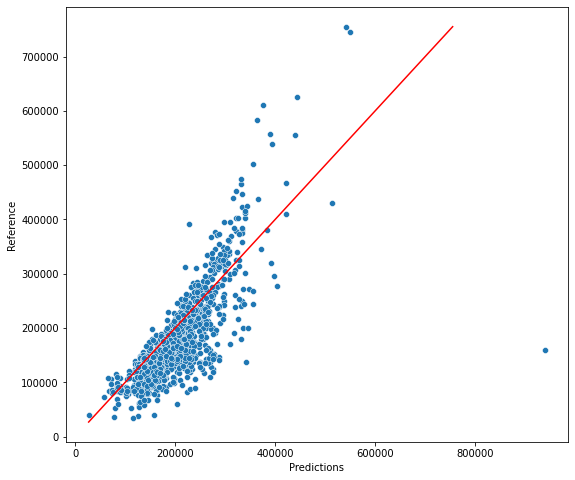

In [151]:
def plot_predictions(y_true, y_pred): 
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = min([min(y_pred.tolist()), min(y_true.tolist())])
    # plot
    plt.figure(figsize=(9,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

plot_predictions(dummy_model_res['SalePrice'], dummy_model_res['preds'])

**Creating our first Linear Model**




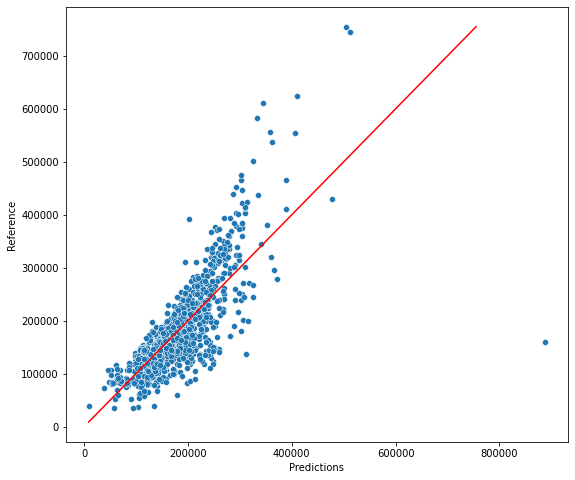

In [152]:
lm = LinearRegression()
lm.fit(np.array(X_train['building_SF']).reshape(-1, 1), y_train)
plot_predictions(y_train, lm.predict(np.array(X_train['building_SF']).reshape(-1, 1)))

In [153]:
np.array(X_train['building_SF']).reshape(-1, 1)

array([[1784],
       [2986],
       [2156],
       ...,
       [2388],
       [1720],
       [3066]])

In [154]:
print(
    lm.coef_, 
    lm.intercept_
    )

[77.00133938] -16841.865639328636


In [155]:
results = pd.DataFrame({
    'predictions':lm.predict(np.array(X_test['building_SF']).reshape(-1, 1)), 
    'true_values':y_test
})
results.head() 

predictions  true_values
1260  176893.504250       181000
274   108824.320235       124500
51    108824.320235       114500
117   156411.147974       155000
789   207925.044021       187500

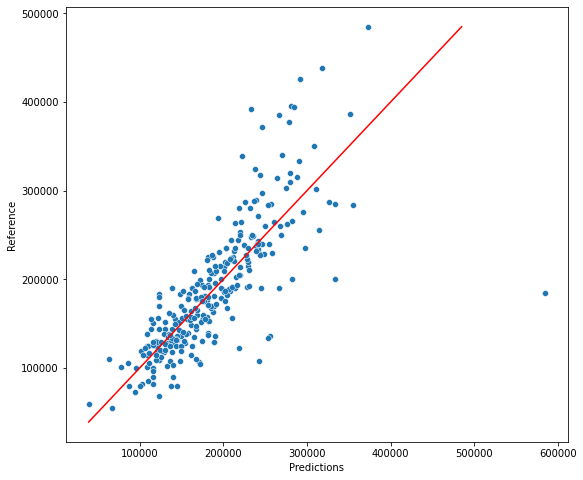

In [156]:
plot_predictions(results.true_values, results.predictions)

In [157]:
mse_pre = (results
               .assign(diff = lambda x: (x.true_values - x.predictions)**2)
               .agg({'diff':{'sum','count'}}))
mse = mse_pre.loc['sum'] / mse_pre.loc['count']
mse

diff    2.110381e+09
dtype: float64

In [158]:
# check our results with sklearn metrics
mod_res = {}
mod_res['1st_iter'] = {}

mod_res['1st_iter']['mse'] = mean_squared_error(results.true_values, results.predictions)
mod_res['1st_iter']['mse']

2110380606.9238365

In [159]:
rmse = (mse_pre.loc['sum'] / mse_pre.loc['count'])**0.5
rmse

diff    45938.879034
dtype: float64

In [160]:
mae_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions))
               .agg({'diff':{'sum','count'}}))
mod_res['1st_iter']['mae'] = mae_pre.loc['sum'] / mae_pre.loc['count']
mod_res['1st_iter']['mae']

diff    29150.360814
dtype: float64

In [161]:
# check our results with sklearn metrics
from sklearn.metrics import mean_absolute_error
mod_res['1st_iter']['mae'] = mean_absolute_error(results.true_values, results.predictions)
mod_res['1st_iter']['mae']

29150.360813840573

In [162]:
# Given that MAPE (mean absolute percentage error) doesn't exist in this version of sklearn, let's write a function:
def mean_abs_perc_error(y_true, y_pred):
    results = pd.DataFrame({
        'predictions':y_pred,
        'true_values':y_true
    })
    mape_pre = (results
               .assign(diff = lambda x: abs(x.true_values - x.predictions)/x.true_values)
               .agg({'diff':{'sum','count'}}))
    mape = mape_pre.loc['sum'] / mape_pre.loc['count']
    return mape.values[0]

# from sklearn.metrics import mean_absolute_percentage_error
mod_res['1st_iter']['mape'] = mean_abs_perc_error(results['true_values'], results['predictions'])
mod_res['1st_iter']['mape']
mod_res

{'1st_iter': {'mae': 29150.360813840573,
  'mape': 0.16435156854635843,
  'mse': 2110380606.9238365}}


        MSE: 2110380606.9238365
        RMSE: 45938.87903425416
        MAE: 29150.360813840573
        MAPE: 0.16435156854635843
        
485000 55000


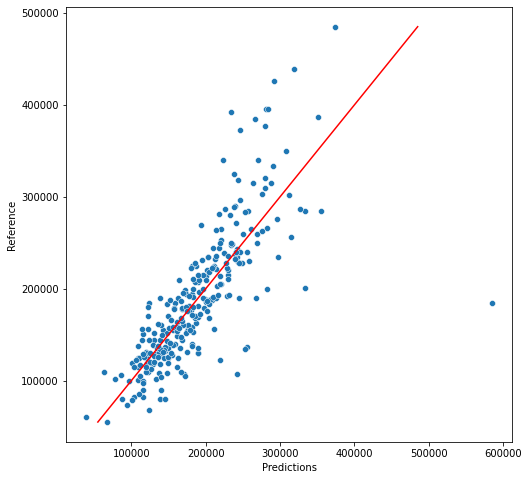

In [163]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)
    }

mod_res['1st_iter'] = plot_predictions(y_test, results['predictions'])

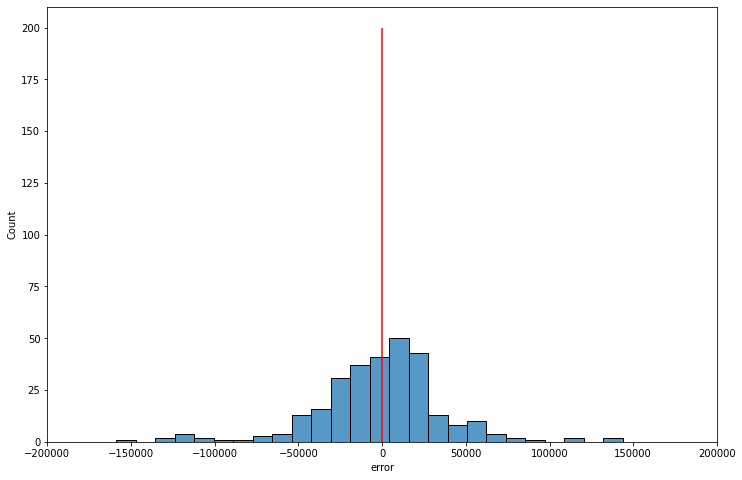

In [164]:
p_df = results.assign(error = lambda x: x['predictions'] - x['true_values'])

plt.subplots(figsize=(12, 8))
sns.histplot(p_df['error'])
plt.vlines(x=0, ymin=0, ymax=200, color='red')
# big problems with outliers
plt.xlim(-200000, 200000)
plt.show()
# skewness

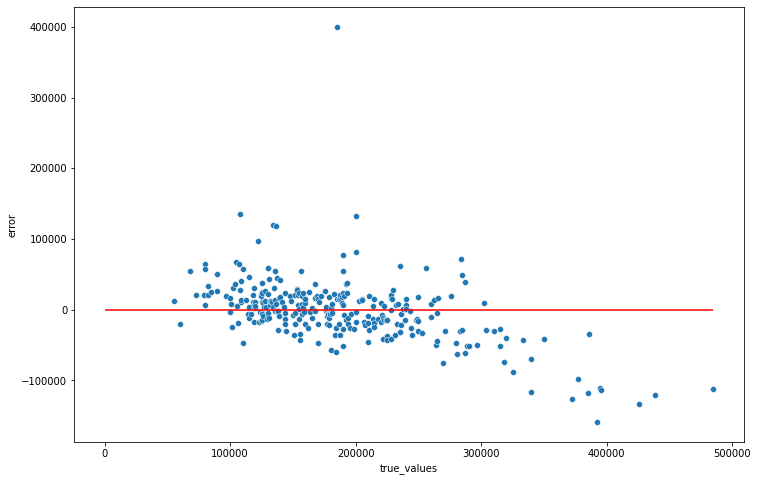

In [165]:
# another way to visualise our errors
p_df = p_df.sort_values(by='true_values')

plt.subplots(figsize=(12, 8))
sns.scatterplot(data=p_df, x='true_values', y='error')
plt.hlines(y=0, xmin=0, xmax=max(p_df['true_values']), color='red')
plt.show()

In [166]:
# check missing values
X_train.isna().sum()[X_train.isna().sum() != 0]

LotFrontage      201
MasVnrType         7
MasVnrArea         7
BsmtExposure      31
Electrical         1
FireplaceQu      574
GarageQual        70
PoolQC          1162
Fence            937
MiscFeature     1124
dtype: int64

**2nd iteration: Sklearn pipeline + all features**

In [167]:
# define a list of numeric columns
num_col = ['yr_sold','Age','Misc_SF','building_SF', 'bast_fin_SQFT', 'MiscVal', 'Fireplaces','TotRmsAbvGrd','GrLivArea','LowQualFinSF','BsmtUnfSF','MasVnrArea','YearRemodAdd','OverallCond','OverallQual','LotArea','LotFrontage']
X_train[num_col].head(10)

yr_sold  Age  Misc_SF  building_SF  bast_fin_SQFT  MiscVal  Fireplaces  \
884        12   55      288         1784            432        0           0   
641        15   21      885         2986            738        0           1   
1357       12   51      500         2156            734        0           1   
469        13   29      720         2542            426        0           0   
222        16   47      851         2265            550        0           1   
512        15   64      624         1728            695        0           0   
359        15   24     1249         3010            956        0           1   
9          14   83      209         2068            851        0           2   
456        14  106      609         1968              0        0           0   
616        15   20      568         2292            457        0           1   

      TotRmsAbvGrd  GrLivArea  LowQualFinSF  BsmtUnfSF  MasVnrArea  \
884              5        892             0        460        60.0   
641              7       1929             0        319         0.0   
1357             6       1078             0        344         0.0   
469              7       1710             0        406       120.0   
222              6       1552             0        163         0.0   
512              5        864             0        169         0.0   
359              7       1924             0        130       530.0   
9                5       1077             0        140         0.0   
456              7       1344             0        624         0.0   
616              7       1509             0        326         0.0   

      YearRemodAdd  OverallCond  OverallQual  LotArea  LotFrontage  
884           1967            5            5     7150         65.0  
641           2001            5            7     7050          NaN  
1357          2008            6            5    12537          NaN  
469           1993            5            6     9291         76.0  
222           1975            6            6    11475         85.0  
512           1958            5            5     9100         70.0  
359           1998            5            8    12011         78.0  
9             1950            6            5     7420         50.0  
456           1950            5            5     4571         34.0  
616           2003            5            6     7861          NaN

In [168]:
# import the missing values imputer from sklearn
import numpy as np
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(strategy='median')
X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])
X_train[num_col].isna().sum()

yr_sold          0
Age              0
Misc_SF          0
building_SF      0
bast_fin_SQFT    0
MiscVal          0
Fireplaces       0
TotRmsAbvGrd     0
GrLivArea        0
LowQualFinSF     0
BsmtUnfSF        0
MasVnrArea       0
YearRemodAdd     0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
dtype: int64

In [169]:
# impute missing values for categorical columns
cat_col = ['Heating_info','Garage-info','GarageQuCo','Bldg_info','Condition','materialsUsed_info','bsmt_fin','roof_info','Location_info',
           'SaleCondition','SaleType','MiscFeature','Fence','PoolQC','PavedDrive','GarageQual','FireplaceQu','Functional','KitchenQual',
           'Electrical','CentralAir','BsmtExposure','Foundation','MasVnrType','ExterCond','ExterQual','Exterior2nd',
           'Exterior1st','Neighborhood','Utilities'
           ]

In [170]:
imp_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_col] = imp_cat.fit_transform(X_train[cat_col])
X_test[cat_col] = imp_cat.transform(X_test[cat_col])
X_train[cat_col].isna().sum()

Heating_info          0
Garage-info           0
GarageQuCo            0
Bldg_info             0
Condition             0
materialsUsed_info    0
bsmt_fin              0
roof_info             0
Location_info         0
SaleCondition         0
SaleType              0
MiscFeature           0
Fence                 0
PoolQC                0
PavedDrive            0
GarageQual            0
FireplaceQu           0
Functional            0
KitchenQual           0
Electrical            0
CentralAir            0
BsmtExposure          0
Foundation            0
MasVnrType            0
ExterCond             0
ExterQual             0
Exterior2nd           0
Exterior1st           0
Neighborhood          0
Utilities             0
dtype: int64

In [171]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

cat_pipeline = Pipeline(steps=[
    ('one_hot_enc', OneHotEncoder(drop='first'))
])
num_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

cat_cols = X_train.select_dtypes('category').columns.tolist()
num_cols = X_train.select_dtypes('float').columns.tolist()
full_processor = ColumnTransformer(transformers=[
    ('number', num_pipeline, num_cols), 
    ('category', cat_pipeline, cat_cols)
])

lm_pipeline = Pipeline(steps=[
    ('processor', full_processor), 
    ('model', LinearRegression())
])

_ = lm_pipeline.fit(X_train, y_train)
lm_pipeline

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler())]),
                                                  ['LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtUnfSF', 'LowQualFinSF',
                                                   'GrLivArea', 'TotRmsAbvGrd',
                                                   'Fireplaces', 'MiscVal',
                                                   'bast_fin_SQFT', 'temp',
                                                   'Baths', 'building_SF',
                                                   'Misc_SF', 'Age',
                                                   'y


        MSE: 1326501626.2175205
        RMSE: 36421.170028124034
        MAE: 21990.167533586573
        MAPE: 0.13504145665126369
        
705267.2077429831 34900


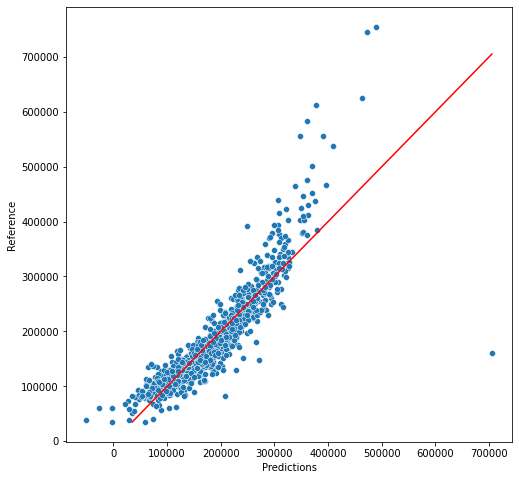

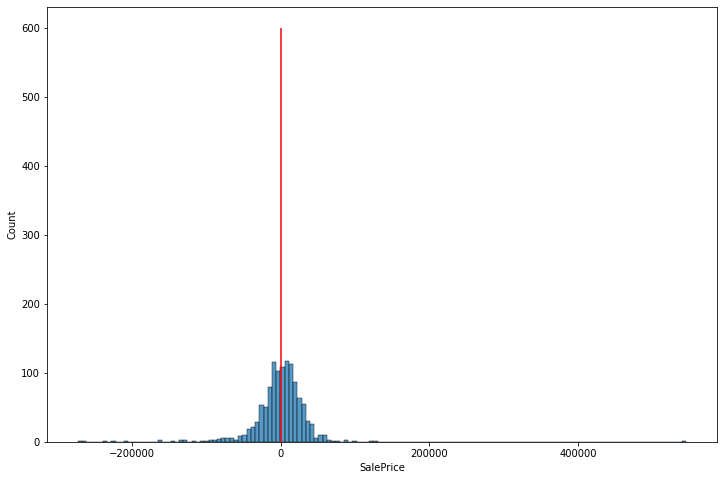

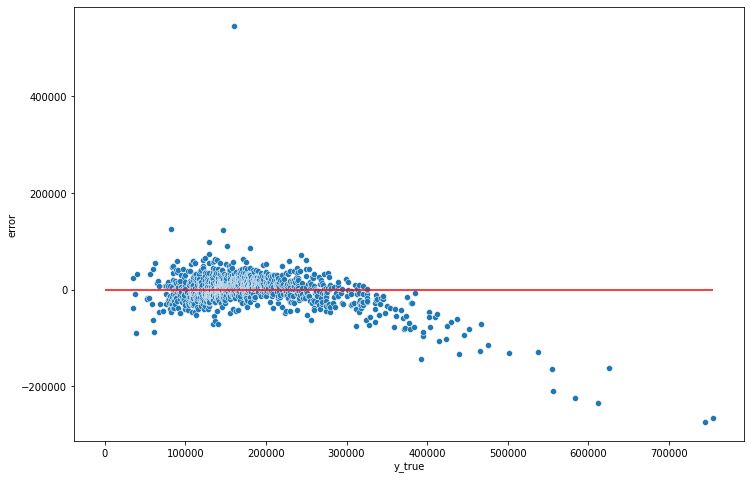

In [172]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_abs_perc_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=600, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_abs_perc_error(y_true, y_pred)

    }

    

# plot_predictions(y_test, results['predictions'])

mod_res['2nd_iter'] = plot_predictions(y_train, lm_pipeline.predict(X_train))

**3rd iteration: Logirithm transformation**

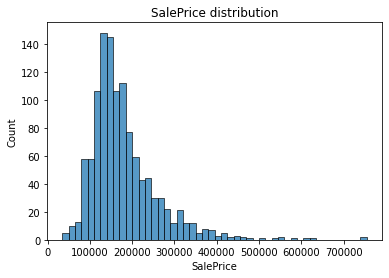

In [173]:
sns.histplot(y_train)
plt.title('SalePrice distribution')
plt.show()

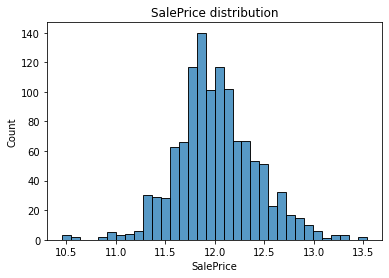

In [174]:
sns.histplot(np.log(y_train))
plt.title('SalePrice distribution')
plt.show()


        MSE: 2792940186.1611414
        RMSE: 52848.2751484014
        MAE: 18441.241159384426
        MAPE: 0.10855199088599318
        
755000 47731.29460853693


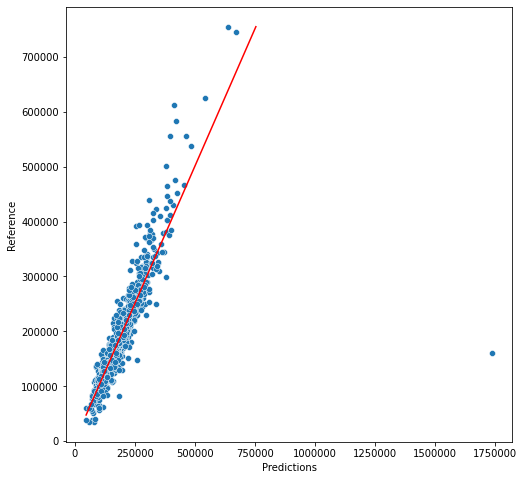

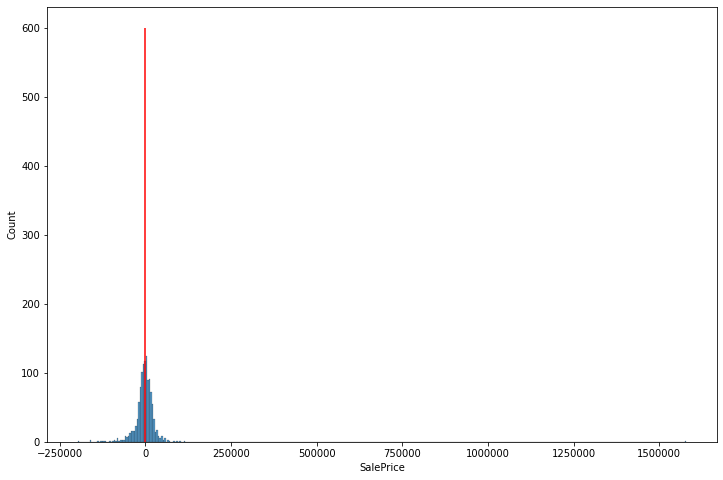

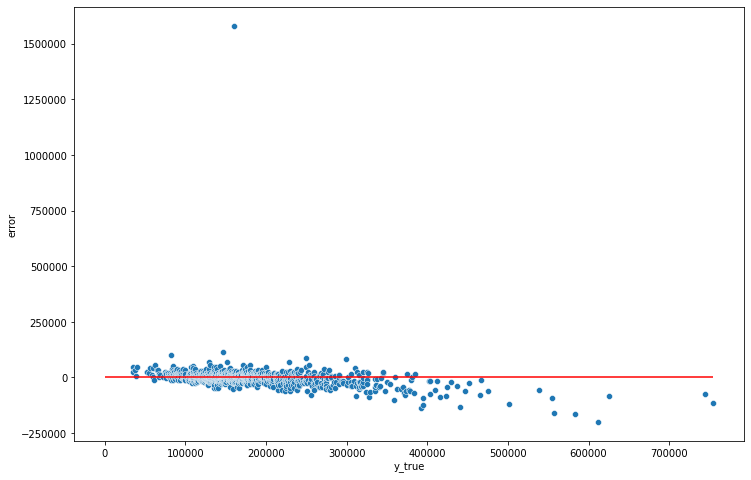

In [175]:
lm_pipeline.fit(X_train, np.log(y_train))
mod_res['3rd_iter'] = plot_predictions(y_train, np.exp(lm_pipeline.predict(X_train)))

**4th iteration: exploring correlation**


Correlation Coeficient (Pearson)

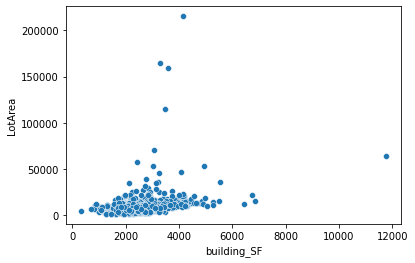

In [176]:
sns.scatterplot(data=X_train, x='building_SF', y='LotArea')
plt.show()

In [177]:
X_train['building_SF']

884     1784.0
641     2986.0
1357    2156.0
469     2542.0
222     2265.0
         ...  
986     2120.0
133     2563.0
361     2388.0
1364    1720.0
451     3066.0
Name: building_SF, Length: 1168, dtype: float64

In [178]:
import numpy as np

X_train_copy = X_train.copy()

X_train_copy['corrn'] = (
    (X_train_copy['building_SF'] - np.mean(X_train_copy['building_SF'])) * 
    (X_train_copy['LotArea'] - np.mean(X_train_copy['LotArea']))
)
X_train_copy.head()

X_train_copy['corr1'] = (X_train_copy['building_SF'] - np.mean(X_train_copy['building_SF']))**2
X_train_copy.head()

X_train_copy['corr2'] = (X_train_copy['LotArea'] - np.mean(X_train_copy['LotArea']))**2
X_train_copy.head()

corrn = sum(X_train_copy['corrn'])/np.sqrt(sum(X_train_copy['corr1']) * sum(X_train_copy['corr2']))
corrn

0.2936536689301759

In [179]:
# 1. function that given two columns, it returns the corr. coeficient
def corr_coeff(df, var1, var2): 
    temp = df.copy()
    temp['corrn'] = (
        (temp[var1] - np.mean(temp[var1])) * 
        (temp[var2] - np.mean(temp[var2]))
    )
    temp['corr1'] = (temp[var1] - np.mean(temp[var1]))**2
    temp['corr2'] = (temp[var2] - np.mean(temp[var2]))**2
    corrn = sum(temp['corrn'])/np.sqrt(sum(temp['corr1']) * sum(temp['corr2']))
    return corrn


# 2. Calculate the corr_coeficients for all the columns
temp = pd.concat([X_train, y_train], axis=1)

print(corr_coeff(temp, 'building_SF', 'LotArea'))
print(corr_coeff(temp, 'SalePrice', 'LotArea'))
# print(corr_coeff(temp, 'price', 'x'))
print(corr_coeff(temp, 'SalePrice', 'building_SF'))

0.2936536689301759
0.25822891255205327
0.7832742895666268


In [180]:
num_cols = X_train.select_dtypes('float').columns
results = []
for col in num_cols:
    res2 = {}
    for col2 in num_cols:
        r = corr_coeff(X_train, col, col2)
        print(f'r between {col} and {col2} is {r}')
        res2[col2] = r
    results.append(res2)
dfr = pd.DataFrame(pd.json_normalize(results))
dfr.index = num_cols

dfr.head()

r between LotFrontage and LotFrontage is 1.0
r between LotFrontage and LotArea is 0.29440089980060496
r between LotFrontage and OverallQual is 0.21755528665646792
r between LotFrontage and OverallCond is -0.04458629882301416
r between LotFrontage and YearRemodAdd is 0.06950169927701036
r between LotFrontage and MasVnrArea is 0.16342968485089332
r between LotFrontage and BsmtUnfSF is 0.11568237900609936
r between LotFrontage and LowQualFinSF is 0.03463334121288855
r between LotFrontage and GrLivArea is 0.36528015472313113
r between LotFrontage and TotRmsAbvGrd is 0.3267677506354768
r between LotFrontage and Fireplaces is 0.23096836178631056
r between LotFrontage and MiscVal is 0.007249208716135914
r between LotFrontage and bast_fin_SQFT is 0.23483251242497732
r between LotFrontage and temp is 0.03310896691051037
r between LotFrontage and Baths is 0.1931967259296868
r between LotFrontage and building_SF is 0.4270624613087257
r between LotFrontage and Misc_SF is 0.317711363073864
r betwee

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
LotFrontage      1.000000  0.294401     0.217555    -0.044586      0.069502   
LotArea          0.294401  1.000000     0.096042     0.008178      0.003004   
OverallQual      0.217555  0.096042     1.000000    -0.065100      0.541355   
OverallCond     -0.044586  0.008178    -0.065100     1.000000      0.113415   
YearRemodAdd     0.069502  0.003004     0.541355     0.113415      1.000000   

              MasVnrArea  BsmtUnfSF  LowQualFinSF  GrLivArea  TotRmsAbvGrd  \
LotFrontage     0.163430   0.115682      0.034633   0.365280      0.326768   
LotArea         0.102461  -0.008363      0.004225   0.250761      0.183426   
OverallQual     0.397535   0.277284     -0.030188   0.595686      0.423568   
OverallCond    -0.126810  -0.127116      0.014230  -0.059431     -0.037821   
YearRemodAdd    0.169029   0.148808     -0.071833   0.277741      0.174119   

              Fireplaces   MiscVal  bast_fin_SQFT      temp     Baths  \
LotFrontage     0.230968  0.007249       0.234833  0.033109  0.193197   
LotArea         0.271166  0.071490       0.239330  0.026898  0.200625   
OverallQual     0.397803 -0.037143       0.240219  0.229766  0.555877   
OverallCond    -0.011769  0.039080      -0.043654  0.010409 -0.153077   
YearRemodAdd    0.098975 -0.024214       0.124438  0.158870  0.443468   

              building_SF   Misc_SF       Age   yr_sold  
LotFrontage      0.427062  0.317711 -0.095106 -0.012894  
LotArea          0.293654  0.212209 -0.001439 -0.013445  
OverallQual      0.665224  0.564803 -0.561232 -0.004734  
OverallCond     -0.130637 -0.069576  0.358499 -0.051682  
YearRemodAdd     0.331069  0.352802 -0.584029 -0.057863

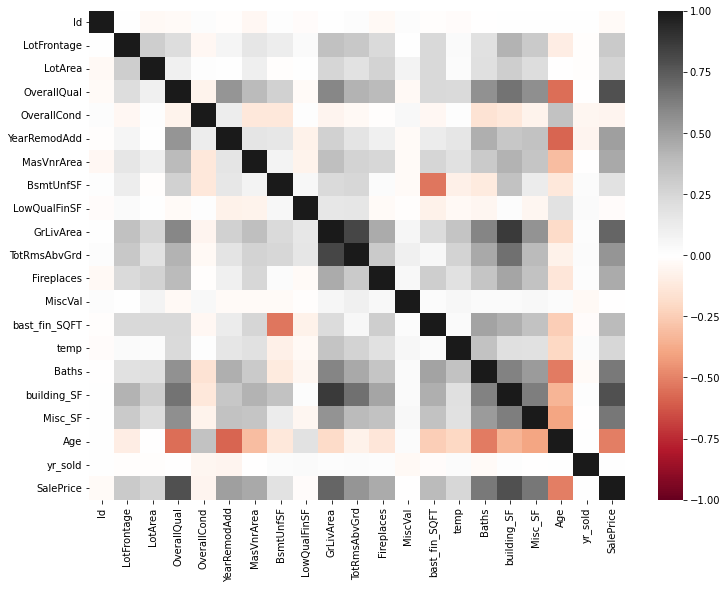

In [ ]:
train = pd.concat([X_train, y_train], axis=1)
plt.subplots(figsize=(12, 9))
sns.heatmap(train.corr(), vmin=-1, vmax=1, cmap='RdGy')
plt.show()

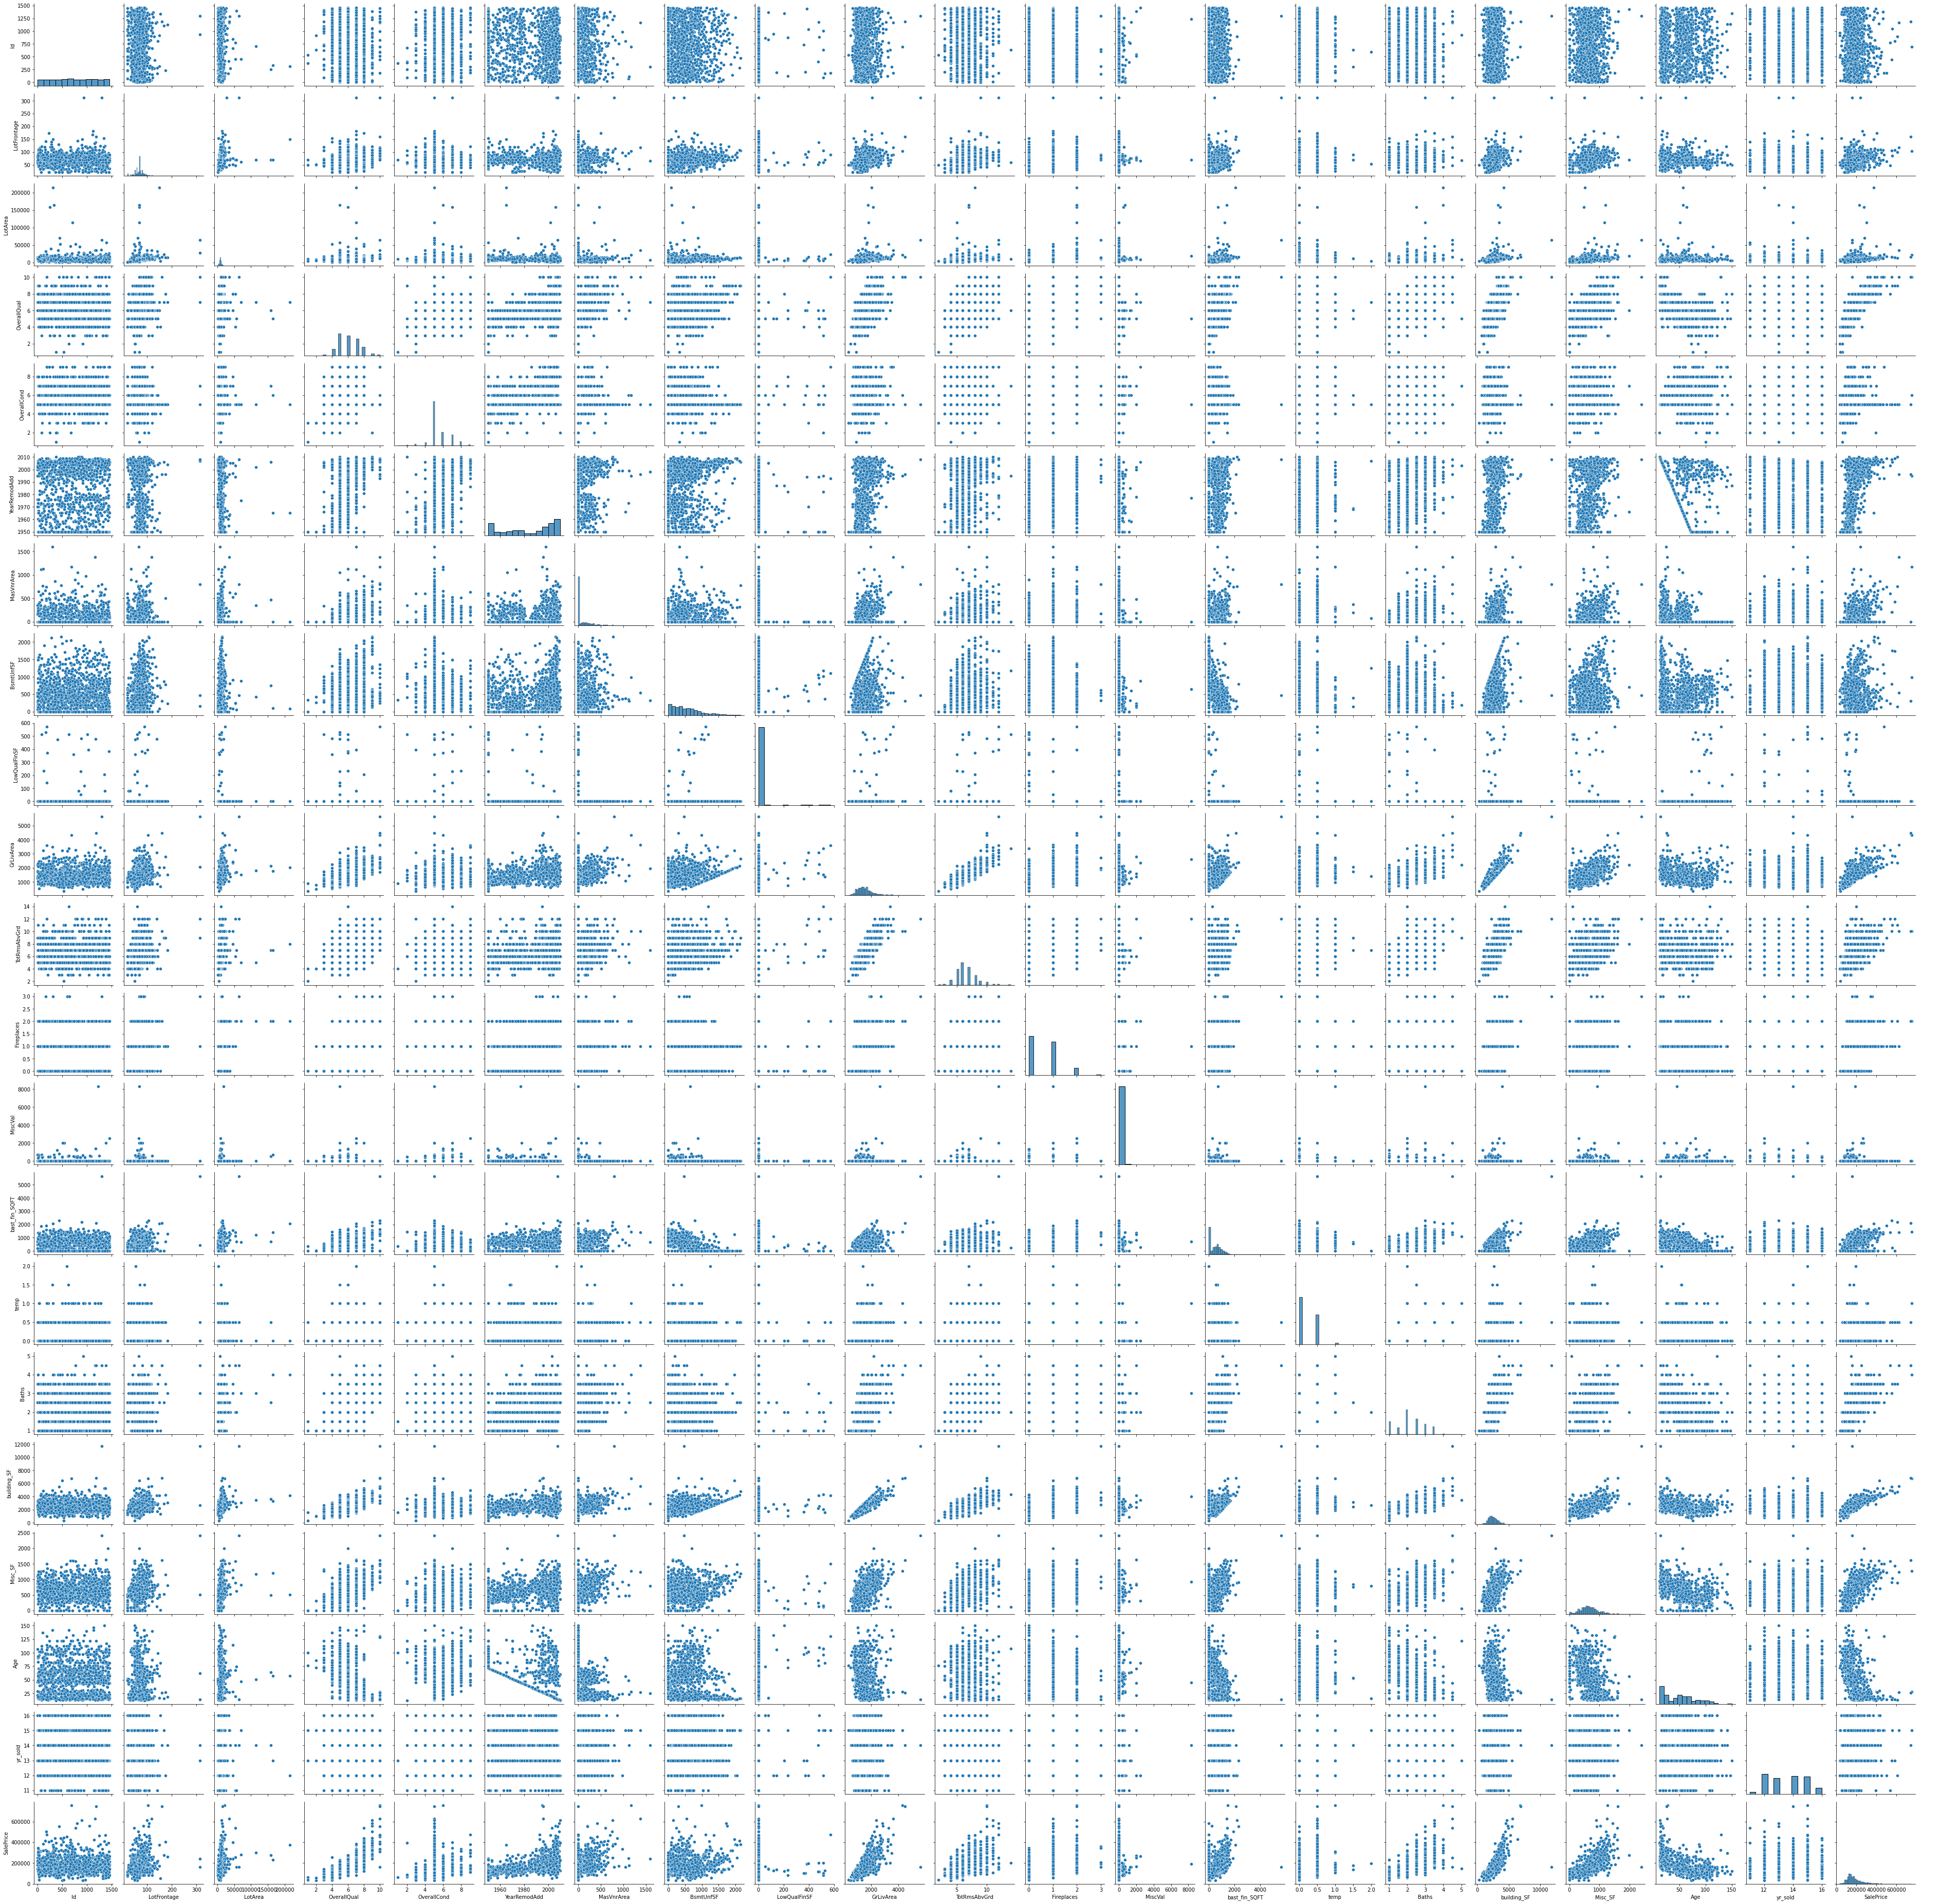

In [ ]:
g = sns.PairGrid(train)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

**5th iteration :** 

**ordinal encoder**

In [181]:

X_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Utilities', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtExposure', 'BsmtUnfSF', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageQual', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'SaleType',
       'SaleCondition', 'Location_info', 'roof_info', 'BsmtCoQC', 'bsmt_fin',
       'bast_fin_SQFT', 'temp', 'Baths', 'materialsUsed_info', 'building_SF',
       'Misc_SF', 'Condition', 'Bldg_info', 'Age', 'yr_sold', 'GarageQuCo',
       'Garage-info', 'Heating_info'],
      dtype='object')

In [182]:

from sklearn.preprocessing import OrdinalEncoder
Neighborhood = ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','Names',
                'NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']
Foundation = ['BrkTil','CBlock','PConc','Slab','Stone','Wood']
Utilities = ['AllPub', 'NoSewr', 'NoSeWa', 'ELO']

cat_pipeline = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder(categories=[Neighborhood, Foundation, Utilities]))
])

cat_cols = X_train.select_dtypes('category').columns.tolist()
num_cols = X_train.select_dtypes('float').columns.tolist()
encoding = ColumnTransformer(transformers=[
    ('category', cat_pipeline, cat_cols),
    ('number', "passthrough", num_cols) 
])

lm_pipeline = Pipeline(steps=[
    ('encoding', encoding), 
    ('scale', MinMaxScaler()),
    ('model', LinearRegression())
])

_ = lm_pipeline.fit(X_train, np.log(y_train))


        MSE: 1851820049.9709551
        RMSE: 43032.778785141854
        MAE: 19221.34740950479
        MAPE: 0.10583167437309399
        
485000 58950.651182723435


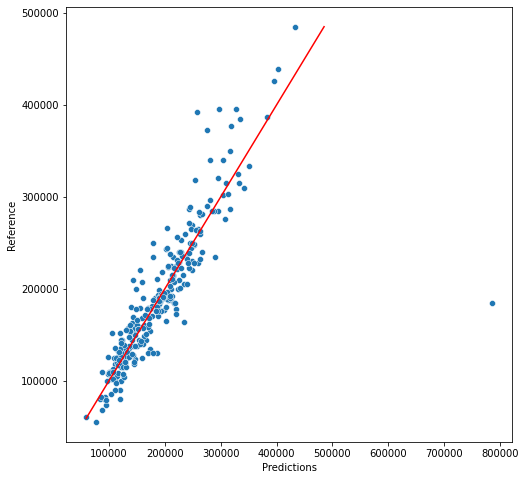

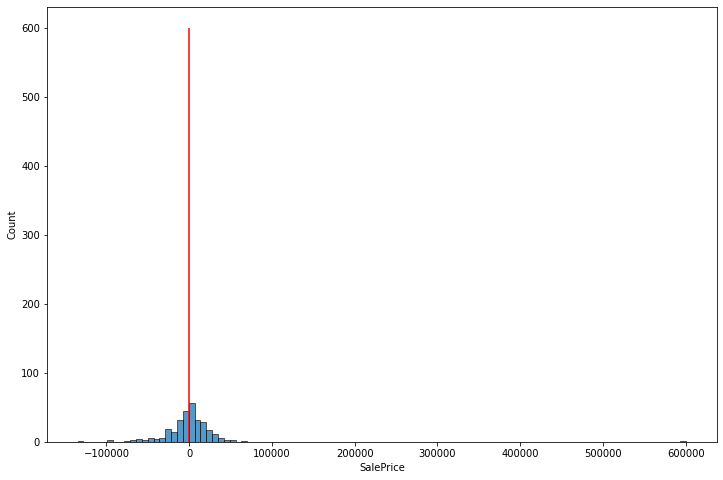

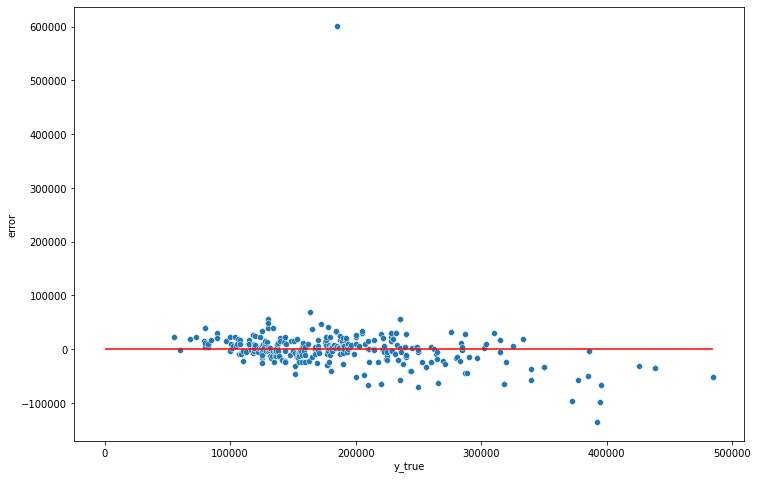

In [ ]:
y_preds = np.exp(lm_pipeline.predict(X_test))
mod_res['4th_iter'] = plot_predictions(y_test, y_preds)

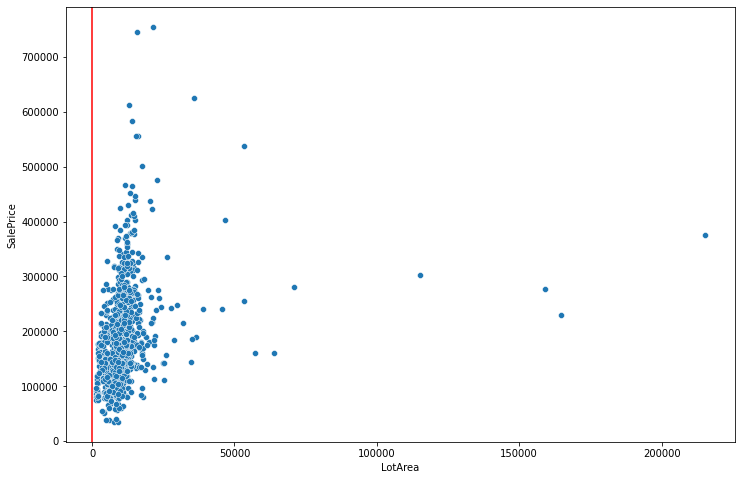

In [183]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['LotArea'], y=y_train)
plt.axvline(x = 2.5, ymin=0, ymax=18000, c='red')
plt.show()

**6th iteration:   outliers**

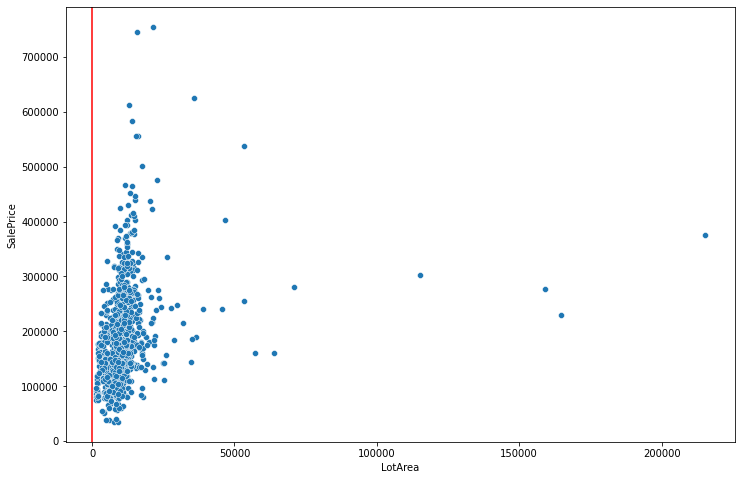

In [184]:
plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_train['LotArea'], y=y_train)
plt.axvline(x = 2.5, ymin=0, ymax=18000, c='red')
plt.show()

In [185]:
X_train['LotArea'].median()

9400.0


        MSE: 13907830197.791454
        RMSE: 117931.46398561944
        MAE: 29501.67940557053
        MAPE: 0.1522116929712093
        
485000 58168.413264334995


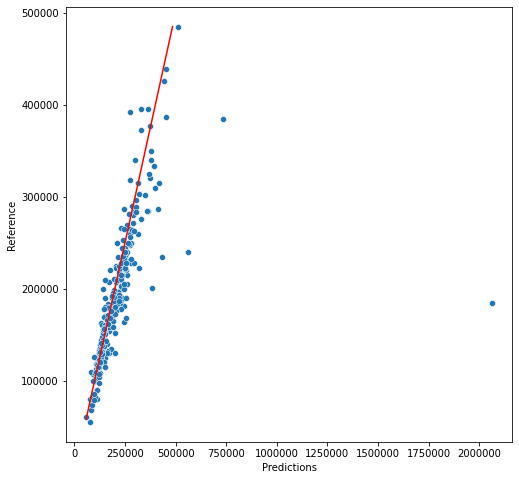

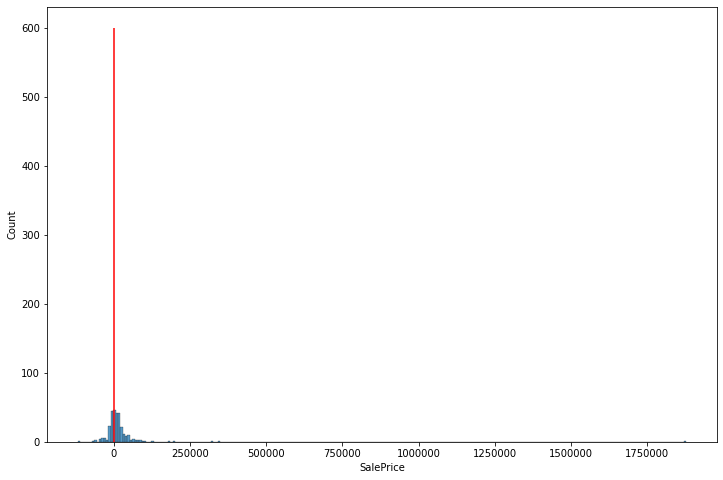

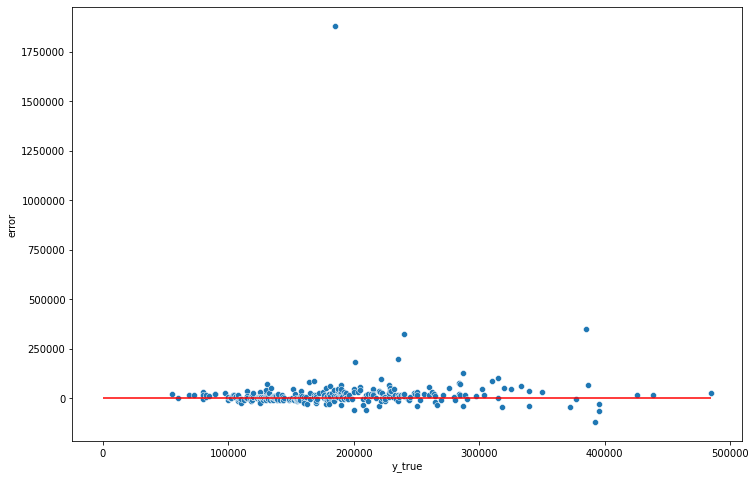

In [186]:
X_filt = (
pd.concat([X_train, y_train], axis=1)
    .query("LotArea < 9400.0")
)
X_train_filt = X_filt.drop(columns='SalePrice')
y_train_filt = X_filt['SalePrice']
_ = lm_pipeline.fit(X_train_filt, np.log(y_train_filt))
y_pred = np.exp(lm_pipeline.predict(X_test))

mod_res['5th_iter'] = plot_predictions(y_test, y_pred)

**7th iteration: model selection**

--------------------
LinearRegression()

        MSE: 1851820049.9709551
        RMSE: 43032.778785141854
        MAE: 19221.34740950479
        MAPE: 0.10583167437309399
        
485000 58950.651182723435


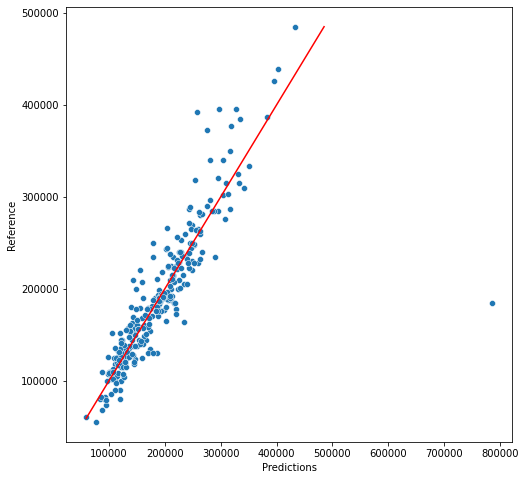

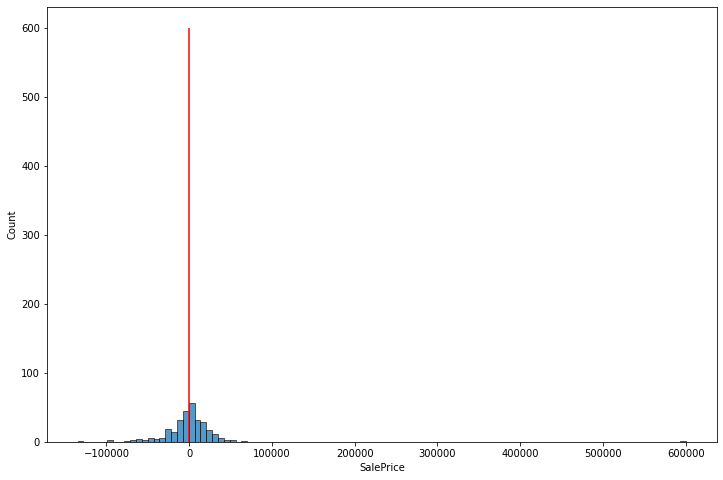

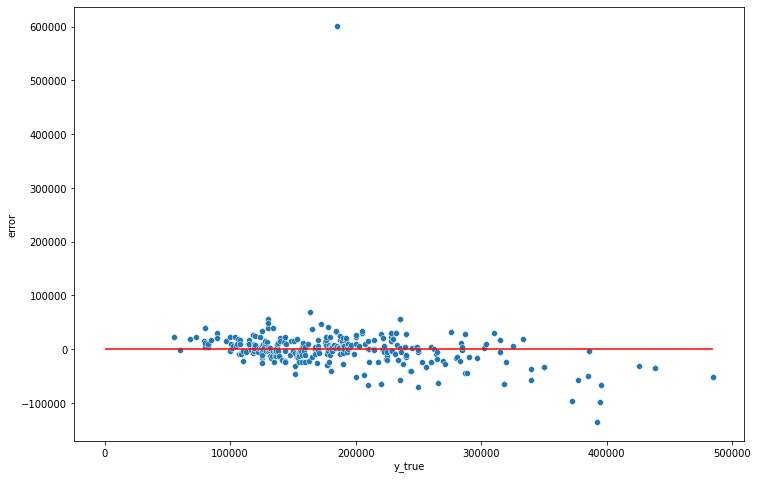

--- 1.0490851402282715 seconds ---
--------------------
RandomForestRegressor()

        MSE: 1231374072.1110706
        RMSE: 35090.94002888881
        MAE: 18342.937575852873
        MAPE: 0.09933232383939232
        
485000 57747.024903858204


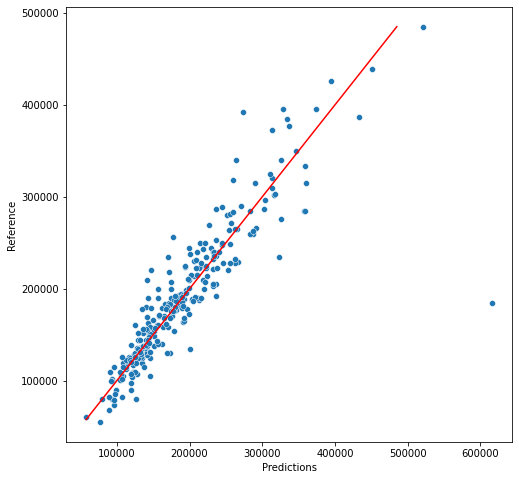

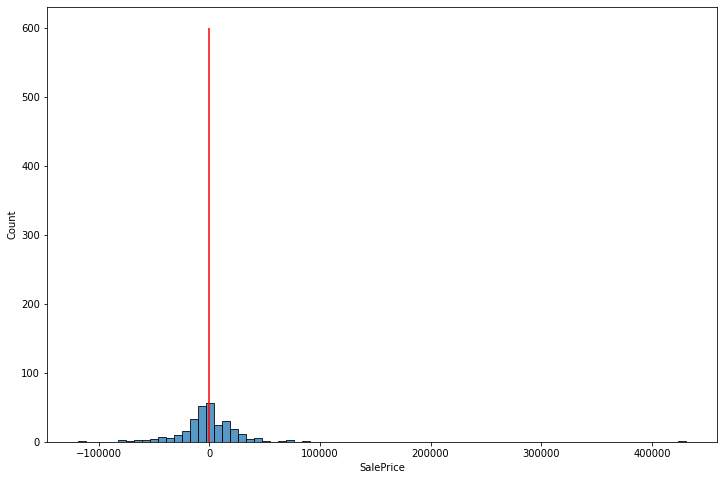

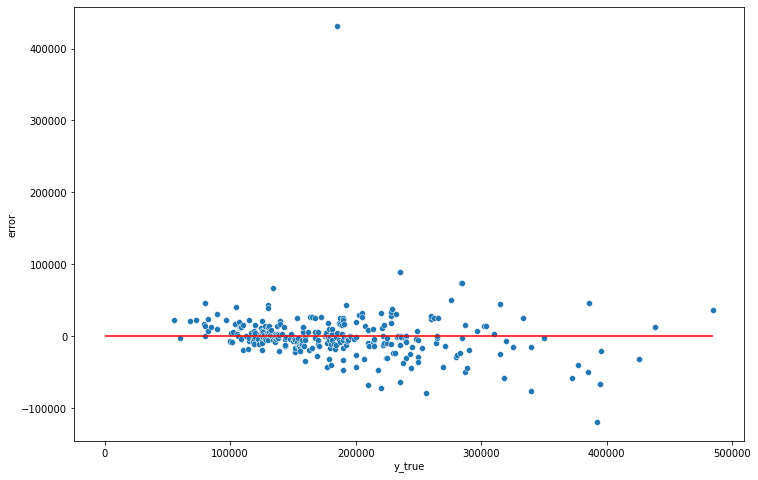

--- 1.6710262298583984 seconds ---
--------------------
KNeighborsRegressor()

        MSE: 1593353340.2325168
        RMSE: 39916.83028789381
        MAE: 23730.956275155066
        MAPE: 0.12389997134495333
        
485000 55752.12349091418


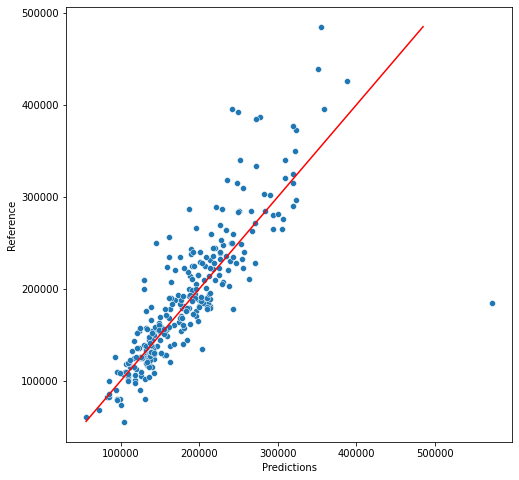

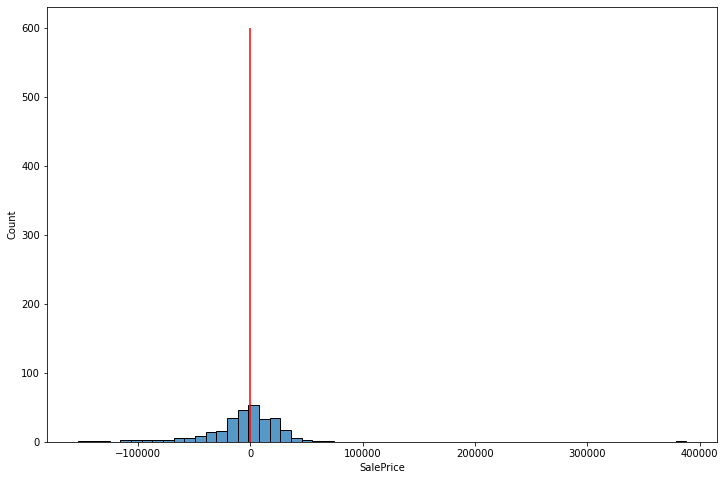

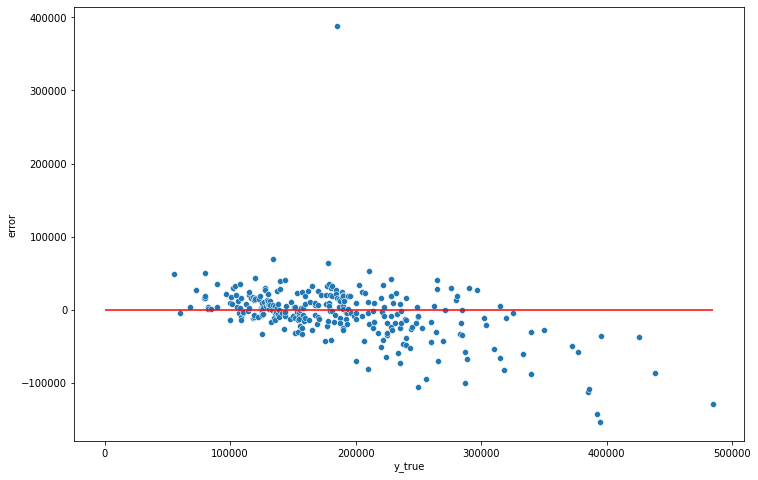

--- 0.7414951324462891 seconds ---
--------------------
SVR()

        MSE: 1805531837.1828485
        RMSE: 42491.55018568808
        MAE: 16441.262505209143
        MAPE: 0.08965036405638534
        
485000 58197.78301150458


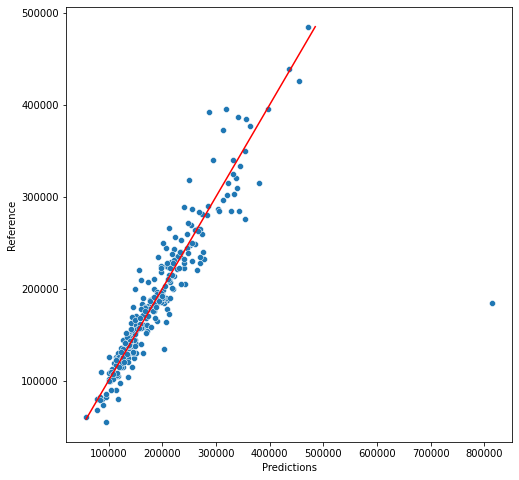

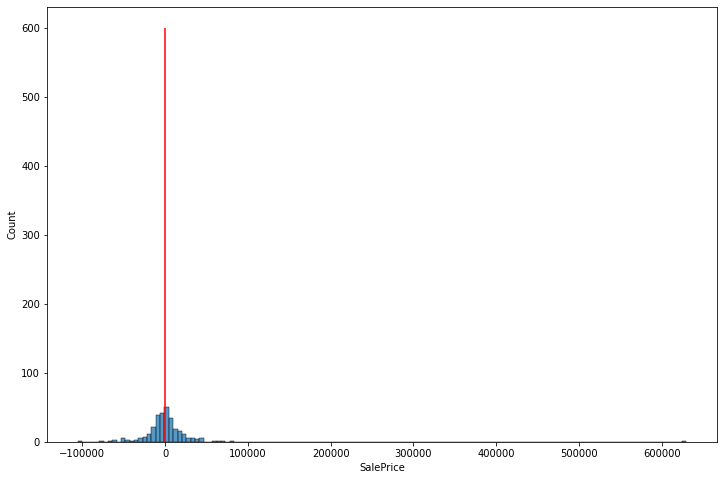

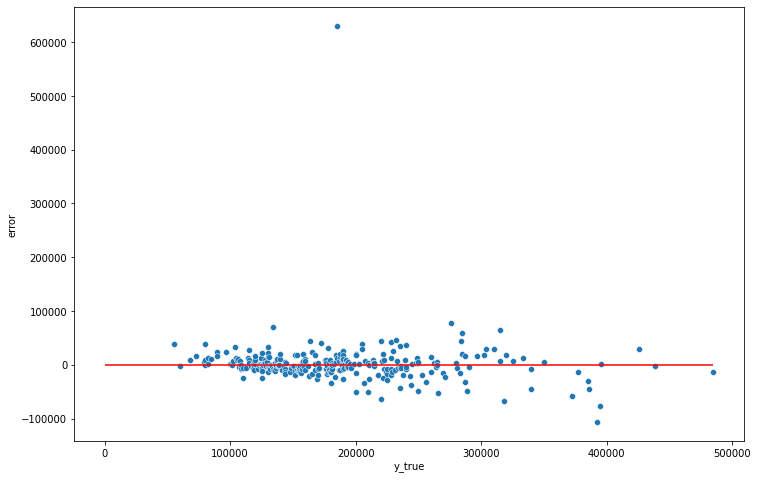

--- 1.0864543914794922 seconds ---


In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import time

for model in [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), SVR()]: 
    print('-'*20)
    print(model)
    start_time = time.time()
    lm_pipeline = Pipeline(steps=[
        ('encoding', encoding), 
        ('scale', MinMaxScaler()),
        ('model', model)
    ])
    _ = lm_pipeline.fit(X_train, np.log(y_train))
    y_pred = np.exp(lm_pipeline.predict(X_test))
    _ = plot_predictions(y_test, y_pred)
    print("--- %s seconds ---" % (time.time() - start_time), sep='/n')


Training with Random Forest

In [188]:
X = housing.filter(['Neighborhood','Foundation','Utilities','LotArea'])
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

In [189]:
Neighborhood = ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','Names',
                'NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']
Foundation = ['BrkTil','CBlock','PConc','Slab','Stone','Wood']
Utilities = ['AllPub', 'NoSewr', 'NoSeWa', 'ELO']

cat_pipeline = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder(categories=[Neighborhood, Foundation, Utilities]))
])

cat_cols = X_train.select_dtypes('category').columns.tolist()
num_cols = X_train.select_dtypes('integer').columns.tolist()
encoding = ColumnTransformer(transformers=[
    ('category', cat_pipeline, cat_cols),
    ('number', "passthrough", num_cols) 
])
from sklearn.preprocessing import StandardScaler
# selected model would be random forest-di
rf_pipeline = Pipeline(steps=[
    ('encoding', encoding), 
    ('scale', StandardScaler()),
    ('model', RandomForestRegressor())
])
_ = rf_pipeline.fit(X_train, np.log(y_train))

In [190]:
import pickle
pickle.dump(
    rf_pipeline, 
    open(file='rf_trained_pipe.sav', mode='wb')
    )

In [191]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [226]:
X = housing.filter(['Id','OverallQual','Neighborhood','GrLivArea'])
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)
Neighborhood = ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','Names',
                'NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']

cat_pipeline = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder(categories=[Neighborhood]))
])

cat_cols = X_train.select_dtypes('category').columns.tolist()
num_cols = X_train.select_dtypes('integer').columns.tolist()
encoding = ColumnTransformer(transformers=[
    ('category', cat_pipeline, cat_cols),
    ('number', "passthrough", num_cols) 
])
from sklearn.preprocessing import StandardScaler
# selected model would be random forest-di
rf_pipeline = Pipeline(steps=[
    ('encoding', encoding), 
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])
_ = rf_pipeline.fit(X_train, np.log(y_train))

In [193]:
import pickle
pickle.dump(
    rf_pipeline, 
    open(file='rf_trained_pipe1.sav', mode='wb')
    )

**Applying test data**

In [215]:
housing_test= pd.read_csv('https://raw.githubusercontent.com/chrissintha/Machine-Learning/main/test_regression.csv')

housing_test.head(4)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  

[4 rows x 80 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


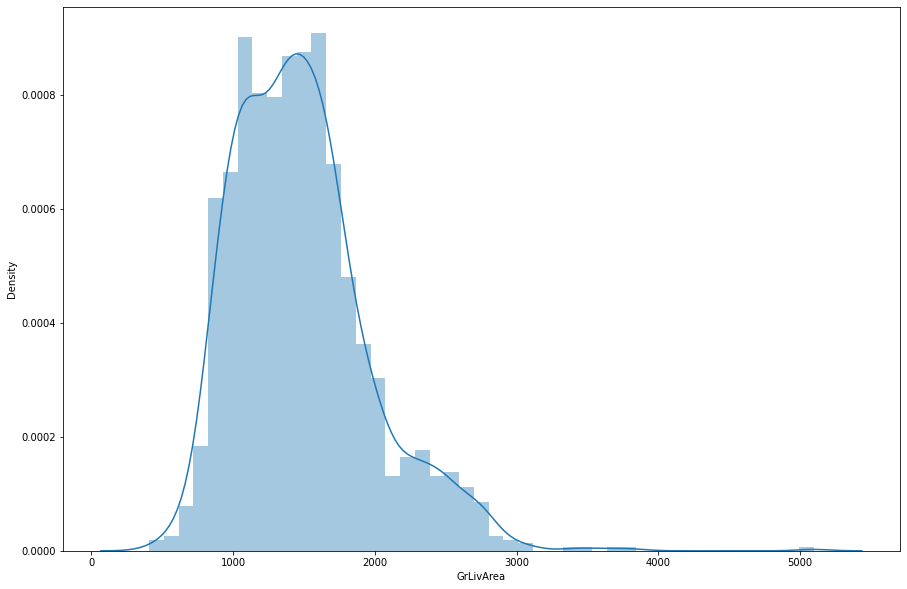

In [195]:
#analysis
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(housing_test['GrLivArea'])

In [196]:
X = housing_test['GrLivArea'].values.reshape(-1,1)
y = housing_test['OverallQual'].values.reshape(-1,1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=8)

Linear Regression

In [198]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [199]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[3.53642036]
[[0.00169893]]


In [200]:
y_pred = regressor.predict(X_test)

In [201]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0         5   5.276128
1         5   5.085847
2         5   6.101809
3         6   5.991379
4         6   6.064433
..      ...        ...
287       6   6.640371
288       5   5.534366
289       6   6.010067
290       6   5.556452
291       6   6.050841

[292 rows x 2 columns]


Calculate with KNeighbors regression





In [216]:
regressor = KNeighborsRegressor()  
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [204]:
#To retrieve the intercept:
print(regressor.score)

#For retrieving the slope:
print(regressor.predict)

<bound method RegressorMixin.score of KNeighborsRegressor()>
<bound method KNeighborsRegressor.predict of KNeighborsRegressor()>


In [205]:
y_pred = regressor.predict(X_test)

In [206]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

Actual  Predicted
0         5        5.4
1         5        5.2
2         5        6.2
3         6        6.0
4         6        6.2
..      ...        ...
287       6        7.4
288       5        5.2
289       6        6.0
290       6        6.4
291       6        6.4

[292 rows x 2 columns]

In [228]:
# Transform it to the same shape as the train df
X = housing_test.filter(['Id','OverallQual','Neighborhood','GrLivArea'])
X_test = X.copy()

In [229]:
X_test.isna().sum()

Id              0
OverallQual     0
Neighborhood    0
GrLivArea       0
dtype: int64

In [230]:

Neighborhood = ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','Names',
                'NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker']

cat_pipeline = Pipeline(steps=[
    ('ord_enc', OrdinalEncoder(categories=[Neighborhood]))
])

cat_cols = X_test.select_dtypes('category').columns.tolist()
num_cols = X_test.select_dtypes('integer').columns.tolist()
encoding = ColumnTransformer(transformers=[
    ('category', cat_pipeline, cat_cols),
    ('number', "passthrough", num_cols) 
])
from sklearn.preprocessing import StandardScaler
# selected model would be random forest
rf_pipeline = Pipeline(steps=[
    ('encoding', encoding), 
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor())
])

In [231]:
# fit our model to the train
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('encoding',
                 ColumnTransformer(transformers=[('category',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder(categories=[['Blmngtn',
                                                                                               'Blueste',
                                                                                               'BrDale',
                                                                                               'BrkSide',
                                                                                               'ClearCr',
                                                                                               'CollgCr',
                                                                                               'Crawfor',
                                                                                          

In [232]:
housing_test['SalePrice'] = rf_pipeline.predict(X_test)

In [ ]:
housing_test['SalePrice']

0       131260.0
1       145020.0
2       181180.0
3       171580.0
4       147240.0
          ...   
1454    140825.0
1455    140825.0
1456    140825.0
1457    124325.0
1458    284223.4
Name: SalePrice, Length: 1459, dtype: float64

In [ ]:
housing_pipeline = housing_test.filter(['Id', 'SalePrice'])

In [ ]:
housing_pipeline

Id  SalePrice
0     1461   131260.0
1     1462   145020.0
2     1463   181180.0
3     1464   171580.0
4     1465   147240.0
...    ...        ...
1454  2915   140825.0
1455  2916   140825.0
1456  2917   140825.0
1457  2918   124325.0
1458  2919   284223.4

[1459 rows x 2 columns]

In [ ]:
housing_data1 = housing_pipeline.to_csv('housing2.csv', index = False)